# Topic Modelling Article Titles with BERTopic

Parts of our notebook: 
* Data Load 
* Preprocessing
* Clustering
* Modelling

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from bertopic import BERTopic

## Data Load

In [38]:
df_titles = pd.read_csv(r"./../../data/raw/JPTIIK_unlabeled.csv")

In [39]:
print(df_titles.head())

                                             article
0  Sistem Pengaman Kendaraan Roda Dua dengan Peng...
1  Implementasi Sistem Pendukung Keputusan untuk ...
2  Pengembangan Database E-Learning PT XYZ menggu...
3  Mekanisme Penyediaan Layanan pada Perangkat Sm...
4  Pengendalian Suhu dan Kelembapan Udara untuk B...


## Preprocessing

In [40]:
vectorizer = TfidfVectorizer(max_features=500)
features_tfidf = vectorizer.fit_transform(df_titles['article'])

In [41]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_tfidf.toarray())

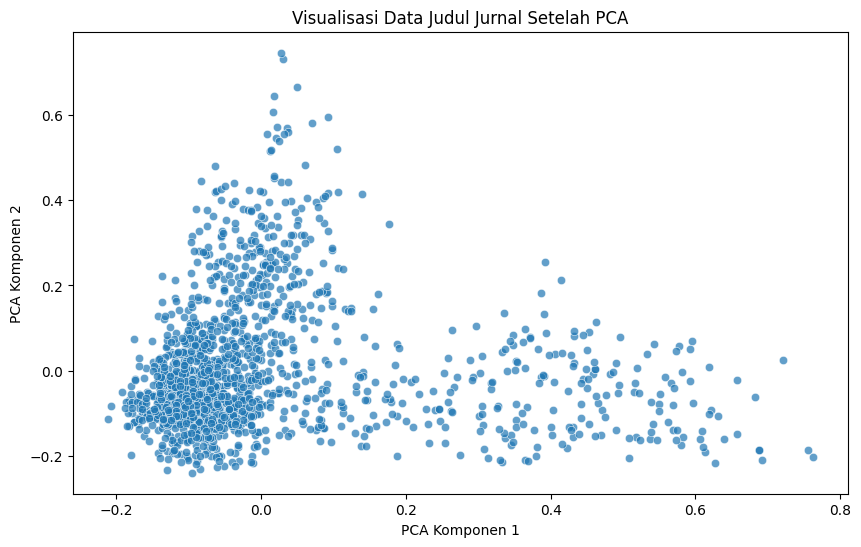

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], alpha=0.7)
plt.title('Visualisasi Data Judul Jurnal Setelah PCA')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.show()

## Clustering

In [43]:
n_clusters = 3 
kmeans = KMeans(n_clusters, random_state=42, n_init=10)

In [44]:
cluster_labels = kmeans.fit_predict(features_pca)

In [45]:
df_titles["cluster"] = cluster_labels

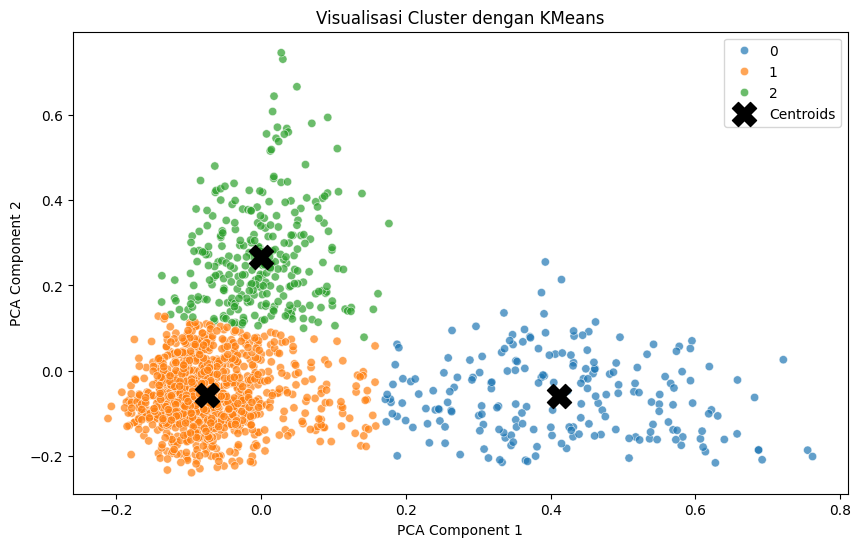

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=cluster_labels, palette="tab10", alpha=0.7)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=300, label="Centroids")

plt.title("Visualisasi Cluster dengan KMeans")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [47]:
silhouette_avg = silhouette_score(features_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6020395413457478


In [48]:
for cluster in range(n_clusters):
    df_titles[df_titles["cluster"] == cluster].to_csv(f"../../data/raw/clustered/cluster_{cluster}.csv", index=False)

## Modelling

In [49]:
cluster_0 = pd.read_csv("../../data/raw/clustered/cluster_0.csv")
cluster_1 = pd.read_csv("../../data/raw/clustered/cluster_1.csv")
cluster_2 = pd.read_csv("../../data/raw/clustered/cluster_2.csv")

clusters = {0: cluster_0, 1: cluster_1, 2: cluster_2}

In [50]:
topic_models = {}
topics_per_cluster = {}

In [51]:
for cluster in range(n_clusters):
    print(f"\n🔍 **Analisis Topik untuk Cluster {cluster}**")
    
    cluster_data = df_titles[df_titles["cluster"] == cluster]["article"].tolist()

    topic_model = BERTopic()
    
    topics, probs = topic_model.fit_transform(cluster_data)
    
    topic_models[cluster] = topic_model
    topics_per_cluster[cluster] = topics

    print(topic_model.get_topic_info())


🔍 **Analisis Topik untuk Cluster 0**
   Topic  Count                                      Name  \
0     -1     35         -1_perancangan_metode_user_design   
1      0     68  0_design_humancentered_human_perancangan   
2      1     31       1_dan_experience_user_questionnaire   
3      2     30      2_thinking_mobile_perancangan_design   
4      3     22     3_thinking_design_pengguna_pengalaman   
5      4     19               4_hcd_human_centered_design   

                                      Representation  \
0  [perancangan, metode, user, design, menggunaka...   
1  [design, humancentered, human, perancangan, me...   
2  [dan, experience, user, questionnaire, evaluas...   
3  [thinking, mobile, perancangan, design, metode...   
4  [thinking, design, pengguna, pengalaman, peran...   
5  [hcd, human, centered, design, perancangan, an...   

                                 Representative_Docs  
0  [Perancangan User Interface (UI) Sistem Inform...  
1  [Perancangan Pengalaman Peng

In [52]:
for cluster in range(n_clusters):
    topic_model = topic_models[cluster]
    fig = topic_model.visualize_barchart(top_n_topics=3)
    
    print(f"Menampilkan Cluster {cluster}")
    fig.show()
    
    time.sleep(2)

Menampilkan Cluster 0


Menampilkan Cluster 1


Menampilkan Cluster 2
